## Scoping

In [1]:
# What is business idea
# What problem you are solving

# ETL (Extract, Transform, Load)

In [2]:
!pip install folium
!pip install folium matplotlib mapclassify
!pip install geodatasets



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
import folium
plt.rcParams['figure.figsize'] = [12, 8]

## Yield

In [4]:
df_sk=pd.read_csv('C:\\Users\\adith\\LHLnotes\\Palette Final project\\Cohort 4\\Palette_Cohort_4\\Data\\rm-yields-data.csv')

In [5]:
df_mb=pd.read_excel('C:\\Users\\adith\\LHLnotes\\Palette Final project\\Cohort 4\\Palette_Cohort_4\\Data\\MMPP - Yield by Soil Type Browser.xlsx')

## Shapefiles

In [6]:
gdf_sk=gpd.read_file('C:\\Users\\adith\\LHLnotes\\Palette Final project\\Cohort 4\\Palette_Cohort_4\\Data\\Rural Municipality\\RuralMunicipality.shp')

In [7]:
gdf_mb=gpd.read_file('C:\\Users\\adith\\LHLnotes\\Palette Final project\\Cohort 4\\Palette_Cohort_4\\Data\\MB_Municipal_Boundries\\MB_Municipal_Boundaries.shp')

In [8]:
gdf_sk.columns

Index(['PPID', 'EFFDT', 'EXPDT', 'FEATURECD', 'RMNO', 'RMNM', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry'],
      dtype='object')

## Transforming

In [9]:
# List of columns
df_sk.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

In [10]:
# List of columns
df_mb.columns

Index(['Year', 'Risk Area / R.M.', 'Crop', 'Soil', 'Farms', 'Acres',
       'Yield/acre(Metric)', 'Yield/acre(Metric).1', 'Yield/acre(Imperial)'],
      dtype='object')

In [11]:
# Info about columns
df_sk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25312 entries, 0 to 25311
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25312 non-null  int64  
 1   RM            25312 non-null  int64  
 2   Winter Wheat  3073 non-null   float64
 3   Canola        14299 non-null  float64
 4   Spring Wheat  25213 non-null  float64
 5   Mustard       4584 non-null   float64
 6   Durum         11753 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          24148 non-null  float64
 9   Lentils       5711 non-null   float64
 10  Peas          8421 non-null   float64
 11  Barley        24987 non-null  float64
 12  Fall Rye      15887 non-null  float64
 13  Canary Seed   3880 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          21146 non-null  float64
 17  Chickpeas     1014 non-null   float64
dtypes: float64(16), int64(2)
m

In [12]:
# Info about columns
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79256 entries, 0 to 79255
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  79256 non-null  int64 
 1   Risk Area / R.M.      79256 non-null  object
 2   Crop                  79256 non-null  object
 3   Soil                  79256 non-null  object
 4   Farms                 79256 non-null  object
 5   Acres                 79256 non-null  object
 6   Yield/acre(Metric)    79256 non-null  object
 7   Yield/acre(Metric).1  38637 non-null  object
 8   Yield/acre(Imperial)  38637 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.4+ MB


In [13]:
# Table heads
df_sk.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [14]:
# Table heads
df_mb.head()

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric),Yield/acre(Metric).1,Yield/acre(Imperial)
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,1998,HAMIOTA,LENTILS,B,8,"1,835.0",0.451 Tonnes,Tonnes,994 Pounds
2,2005,THOMPSON,WHITE PEA BEANS,E,11,"1,253.0",0.451 Tonnes,Tonnes,994 Pounds
3,1997,RHINELAND,WHITE PEA BEANS,C,29,"3,399.0",0.450 Tonnes,Tonnes,992 Pounds
4,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds


In [15]:
df_mb['Yield/acre(Metric)']=df_mb['Yield/acre(Metric)'].str.replace(' Tonnes', '') # Replacing Tonnes
df_mb['Yield/acre(Metric)']=df_mb['Yield/acre(Metric)'].replace('Tolerance', np.NaN) # Replacing Tolerance
df_mb['Yield/acre(Metric)']=df_mb['Yield/acre(Metric)'].astype(float) # changing object to float data type

In [16]:
df_mb_pivot=pd.pivot_table(df_mb.drop(columns=['Yield/acre(Metric).1', 'Yield/acre(Imperial)', 'Soil', 'Farms' ]),
               index=['Risk Area / R.M.', 'Year'], columns='Crop', values='Yield/acre(Metric)')\
               .reset_index()

In [17]:
df_sk.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

In [18]:
df_mb_pivot.columns

Index(['Risk Area / R.M.', 'Year', 'ALFALFA', 'ARGENTINE CANOLA', 'BARLEY',
       'CANARYSEED', 'DURUM WHEAT', 'FABABEANS', 'LENTILS', 'OATS',
       'POLISH CANOLA', 'RED SPRING WHEAT', 'WHITE PEA BEANS'],
      dtype='object', name='Crop')

In [19]:
df_mb_clean=df_mb_pivot.rename(columns={
    'Risk Area / R.M.': 'RM', 
    'ARGENTINE CANOLA': 'Canola', 
    'BARLEY':'Barley',
    'CANARYSEED': 'Canary Seed', 
    'DURUM WHEAT': 'Durum Wheat', 
     'LENTILS': 'Lentils', 
     'OATS': 'Oats',
    'RED SPRING WHEAT': 'Spring Wheat', 
    'WHITE PEA BEANS': 'Peas'}) \
        .drop(columns=['ALFALFA', 'FABABEANS', 'FABABEANS', 'POLISH CANOLA'] )

In [20]:
df_sk_clean=df_sk.rename(columns={'Durum': 'Durum Wheat'}).drop(columns=['Winter Wheat', 'Mustard', 'Sunflowers', 'Fall Rye', 'Spring Rye', 'Tame Hay','Flax', 'Chickpeas' ] )

In [21]:
df_sk_clean

,Year,RM,Canola,Spring Wheat,Durum Wheat,Oats,Lentils,Peas,Barley,Canary Seed
0,1938,1,NaN,4.0,NaN,1.0,NaN,NaN,1.0,NaN
1,1939,1,NaN,9.0,NaN,16.0,NaN,NaN,16.0,NaN
2,1940,1,NaN,12.0,NaN,23.0,NaN,NaN,19.0,NaN
3,1941,1,NaN,18.0,NaN,32.0,NaN,NaN,28.0,NaN
4,1942,1,NaN,20.0,NaN,35.0,NaN,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...
25307,2018,622,39.3,59.5,NaN,96.4,NaN,43.0,54.0,NaN
25308,2019,622,46.1,63.9,NaN,106.0,NaN,33.7,73.9,NaN
25309,2020,622,40.9,55.1,NaN,94.5,NaN,49.2,74.3,NaN
25310,2021,622,23.9,17.0,NaN,25.8,NaN,NaN,23.3,NaN


In [22]:
df_mb_clean

Crop,RM,Year,Canola,Barley,Canary Seed,Durum Wheat,Lentils,Oats,Spring Wheat,Peas
0,ALEXANDER,1993,0.251000,NaN,NaN,NaN,NaN,NaN,0.338000,NaN
1,ALEXANDER,1994,0.289000,NaN,NaN,NaN,NaN,NaN,0.587333,NaN
2,ALEXANDER,1995,0.620000,NaN,NaN,NaN,NaN,NaN,0.669500,NaN
3,ALEXANDER,1996,0.755333,1.6955,0.212,NaN,NaN,0.956000,0.976500,NaN
4,ALEXANDER,1997,0.651333,NaN,NaN,NaN,NaN,1.184000,0.971750,NaN
...,...,...,...,...,...,...,...,...,...,...
2800,YELLOWHEAD,2018,1.122333,1.9260,NaN,NaN,NaN,2.094000,1.857333,NaN
2801,YELLOWHEAD,2019,0.963500,1.8620,NaN,NaN,NaN,1.740500,1.660000,NaN
2802,YELLOWHEAD,2020,0.968000,1.9245,NaN,NaN,NaN,1.725667,1.631667,NaN
2803,YELLOWHEAD,2021,0.888000,1.7200,NaN,NaN,NaN,1.651500,1.582000,NaN


In [23]:
# Crop conversion in MB tonnes to bushel
df_mb_clean['Canola']=df_mb_clean['Canola'] * 44.092
df_mb_clean['Barley']=df_mb_clean['Barley'] * 45.93
df_mb_clean['Canary Seed']=df_mb_clean['Canary Seed'] * 44.092
df_mb_clean['Durum Wheat']=df_mb_clean['Durum Wheat'] * 36.74
df_mb_clean['Lentils']=df_mb_clean['Lentils'] * 36.74
df_mb_clean['Oats']=df_mb_clean['Oats'] * 64.842
df_mb_clean['Spring Wheat']=df_mb_clean['Spring Wheat'] * 36.74
df_mb_clean['Peas']=df_mb_clean['Peas'] *  36.74


In [24]:
# Crop Conversion in SK - pounds to bushels
df_sk_clean['Lentils']=df_sk_clean['Lentils'] / 60
df_sk_clean['Canary Seed']=df_sk_clean['Canary Seed'] / 50

In [25]:
# Creating province column
df_mb_clean['Province'] = 'MB'
df_sk_clean['Province'] = 'SK'

In [26]:
# More like copy paste in excel under existing data. Make sure column names are the same
df = pd.concat([df_mb_clean, df_sk_clean])

# EDA(Exploratory Data Analysis)

## Missing Values

In [22]:
df.isna().sum().sort_values().plot(kind='bar', color='green')
plt.title('Missing Values- 1938 to 2022', color='Gray')
plt.xlabel('Crops')
plt.ylabel('# of Missing values')
plt.axhline(len(df)/2, linestyle='--', color='red')
plt.axhline(len(df)/4, linestyle='--', color='red')
plt.axhline(len(df)/10, linestyle='--', color='red')
plt.show()

NameError: name 'df' is not defined

In [20]:
df.loc[df['Year']>2002].isna().sum().sort_values().plot(kind='bar', color='green')
plt.title('Missing Values - 2002 to 2022')
plt.xlabel('Crops')
plt.ylabel('# of Missing values')
plt.axhline(len(df)/2, linestyle='--', color='red')
plt.axhline(len(df)/4, linestyle='--', color='red')
plt.axhline(len(df)/10, linestyle='--', color='red')
plt.show()

NameError: name 'df' is not defined

## Outliers

In [29]:
crop_columns=['Canola', 'Barley', 'Canary Seed', 'Durum Wheat',
       'Lentils', 'Oats', 'Spring Wheat', 'Peas']

## Histograms

In [21]:
df[crop_columns].hist(bins=300)
plt.show()

NameError: name 'df' is not defined

In [1]:
sb.heatmap(df[crop_columns].corr(), annot=True)

## Boxplots

In [2]:
#df[crop_columns].boxplot()

In [33]:
df.loc[df['Spring Wheat']>180]

,RM,Year,Canola,Barley,Canary Seed,Durum Wheat,Lentils,Oats,Spring Wheat,Peas,Province
16215,314,2018,33.0,43.5,NaN,NaN,29.033333,41.0,198.0,35.0,SK


In [3]:
# Peorson Corr (-1 to 1), -1 negative corr, o no corr, 1 positive corr
# Using Seaborn
#sb.heatmap(df[crop_columns].corr(),annot=True, cmap='Greens')


## GIS Analyis

In [35]:
# CRS --> Cordinate Reference Systems
gdf_mb['geometry'].crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
# Standardazing CRS formats
gdf_sk['geometry']=gdf_sk['geometry'].to_crs('epsg:4326')
gdf_mb['geometry']=gdf_mb['geometry'].to_crs('epsg:4326')

In [37]:
# Renaming column name
gdf_sk['RMNO']=gdf_sk['RMNO'].astype(int)

In [38]:
print(gdf_mb.columns)


Index(['MUNI_NO', 'MUNI_NAME', 'MUNI_TYPE', 'Shape_Leng', 'Shape_Area', 'NAME',
       'NAME_TYPE', 'geometry'],
      dtype='object')


In [39]:
#set(gdf['RM'].unique()) - set(df_sk_clean['RM'].unique())

In [40]:
gdf_mb['MUNI_NAME']=gdf_mb['MUNI_NAME'].str.replace('RM OF ','')

In [41]:
gdf=pd.concat([gdf_sk[['RMNO','geometry']].rename(columns={'RMNO':'RM'}),gdf_mb[['MUNI_NAME', 'geometry']].rename(columns={'MUNI_NAME':'RM'})])

In [4]:
#gdf.plot()
#gdf.explore()

In [5]:
#gdf.explore()

In [44]:
gdf['RM']=gdf['RM'].astype('string')
df['RM']=df['RM'].astype('string')

In [45]:
# SQL inner join
df_gdf=pd.merge(gdf, df, on='RM', how='inner') 

In [46]:
print('Before merging', gdf['RM'].nunique())
print('After merging',df_gdf['RM'].nunique())

Before merging 481
After merging 352


In [47]:
ds=df_gdf.copy()

### GIS Visualization

#### Explore functiom

In [48]:
m=ds.loc[ds['Year']==2021].explore(column='Canola', 
                                 legend=True,  
                                 cmap='Greens',
                                 tooltip= ['Canola', 'RM'],
                                 tiles='Stamen Toner') # Plot() is good for showing up in GitHub, Explore() is good for interactive map and saving as HTML

# Adding a title with dark orange color to the folium map
title_html = '''
                 <h3 align="center" style="font-size:30px; color:Green;"><b> Canola Yield in 2021 </b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
m.save('C:\\Users\\adith\\LHLnotes\\Palette Final project\\Cohort 4\\Palette_Cohort_4\\Data\\Canola_2021.html')

In [6]:
#m


#### Plot

In [7]:
ds.loc[ds['Year']==2021].plot(column='Canola', 
                                 legend=True,  
                                 cmap='Greens')

IndentationError: unexpected indent (391435067.py, line 2)

## Tableau

## Aggragetions

In [51]:
df_03_22=df.loc[df['Year']>2002].sort_values(['RM', 'Year'])

NameError: name 'df_03_22' is not defined

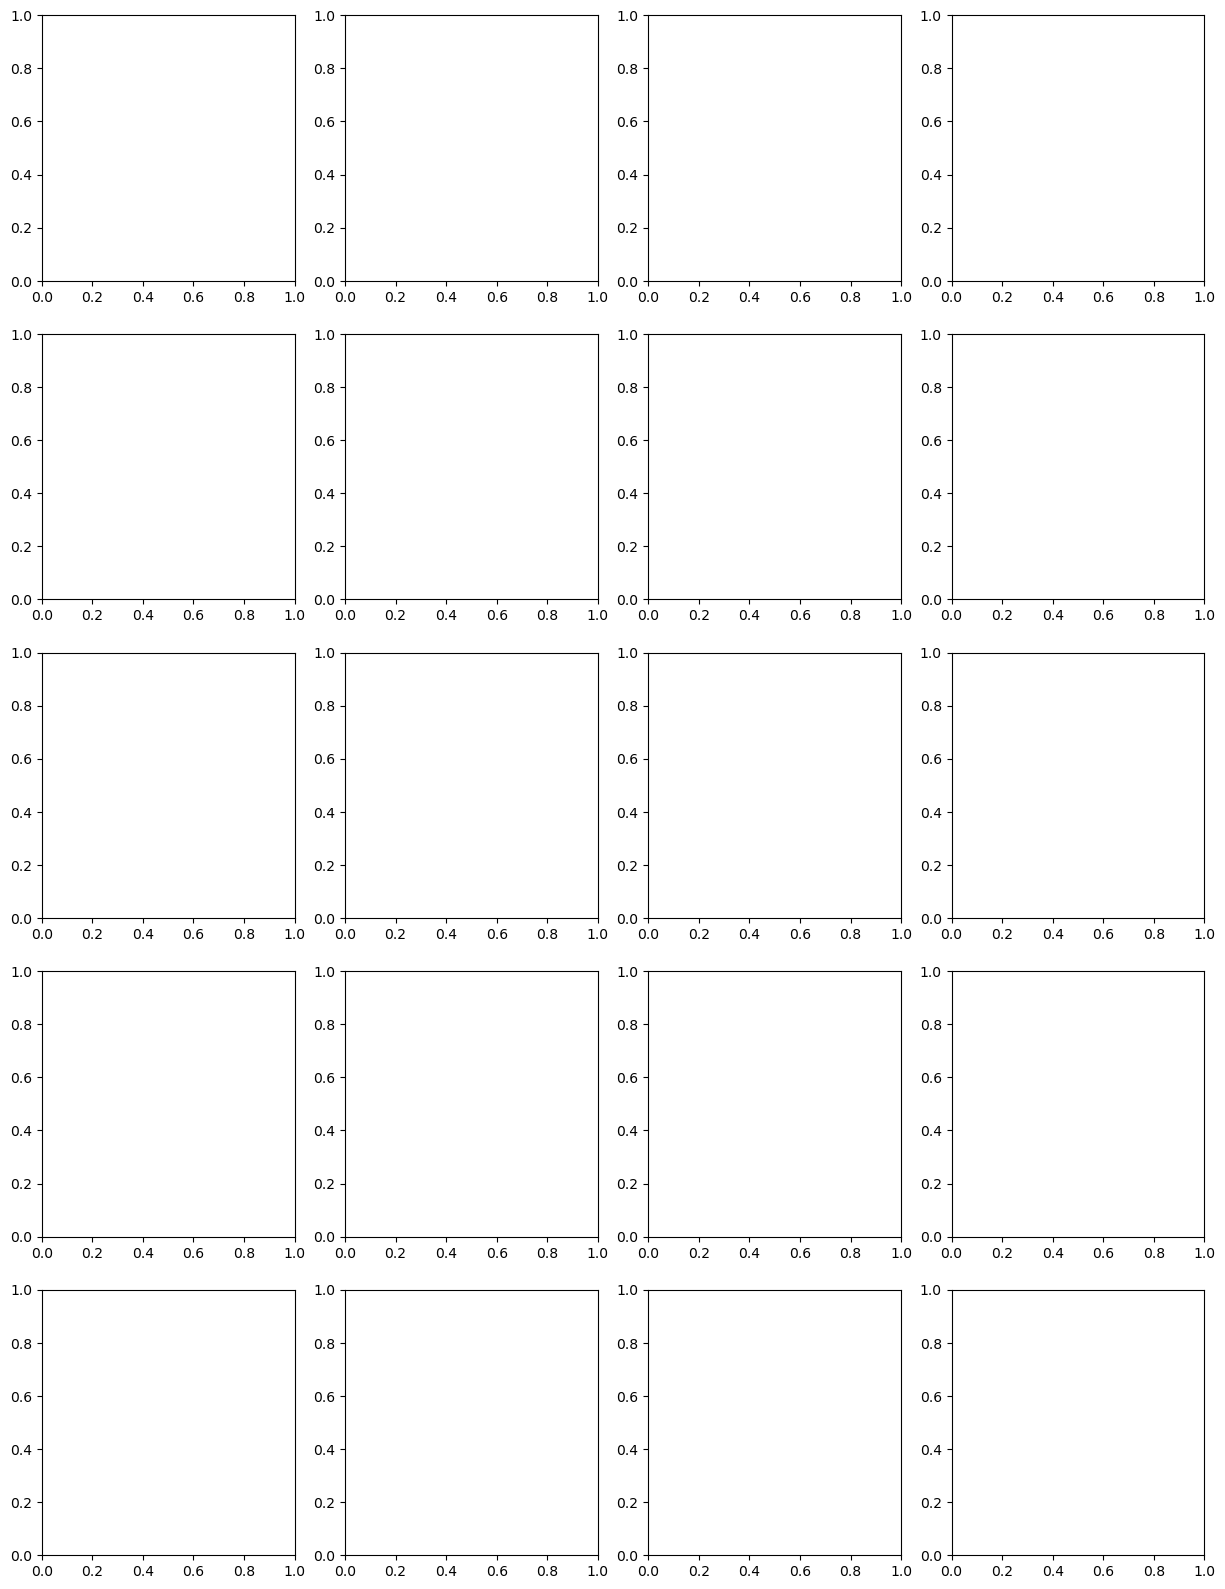

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 4, figsize=(15, 20))
years = df_03_22['Year'].unique()

for i, year in enumerate(years):
    ax = axes[i//4, i%4]
    merged_df = pd.merge(gdf, df_03_22.loc[df_03_22['Year'] == year], on='RM')
    merged_df.plot(column='Canola', cmap='RdYlGn', legend=True, ax=ax)
    ax.set_title(f'Canola Yield in {year}', color='Blue', size=12)

plt.tight_layout()
plt.show()

In [53]:
agg_funcs = {
    column: ['mean', 'std', 'median'] for column in crop_columns
}

df_agg = df_03_22.set_index('RM')[crop_columns].groupby('RM').agg(agg_funcs)

# Optionally, to flatten the multi-level columns:
df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]

# Dropping missing values for Canola mean.
df_agg=df_agg.dropna(subset='Canola_mean')

In [54]:
df_agg.shape

(392, 24)

# Feature Selection

## Filtered Methods

In [55]:
# ANOVA
# Pearson Correlation

## Wrapper

In [56]:
## Recurisive Feature Elimnation
## Backward feature elimination

## Emedded 

In [57]:
# Decision Tree
# Lasso Reg

# Standardizing/Split

In [58]:
# Only for Supervised ML, not unsupervised

# Training Models

In [59]:
# Use default parameters - not advised

# Parameter tuning
# Use always grid search

## K-Means Clustering

In [60]:
# Importing library
from sklearn.cluster import KMeans 

df_agg_can= df_agg[['Canola_mean', 'Canola_std']]

# Let's define our features
X = df_agg_can.copy()

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM = KMeans(n_clusters=n, init='k-means++', n_init=10).fit(X)
    clusters_inertia.append(KM.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X, KM.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [61]:
X.shape

(392, 2)

## Elbow Metod

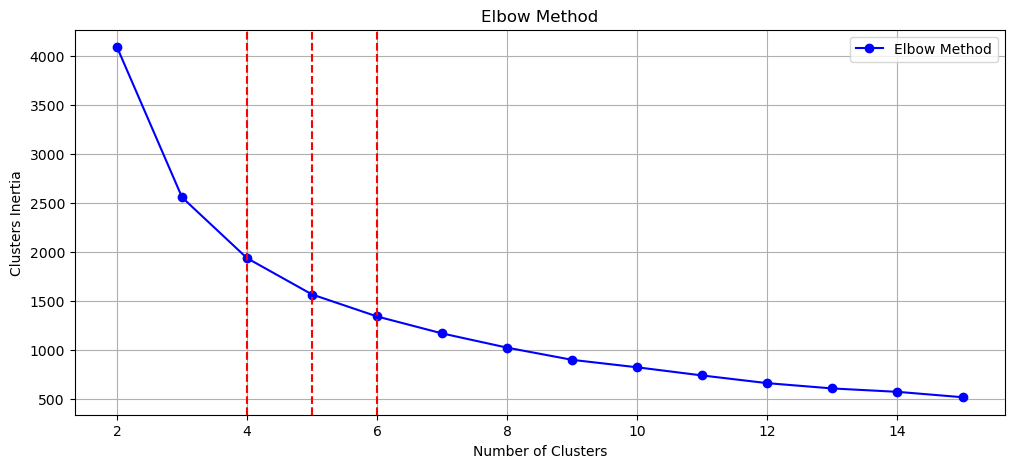

In [62]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(n_clusters, clusters_inertia, 'o-', color='blue', label='Elbow Method')
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Clusters Inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.legend()
plt.show()

## Silhouette Score

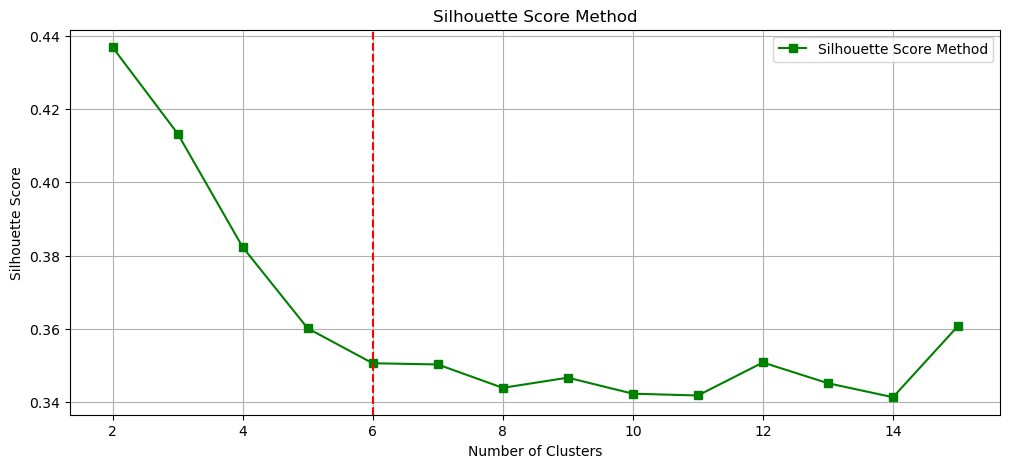

In [63]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(n_clusters, s_scores, 's-', color='green', label='Silhouette Score Method')
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.legend()
plt.show()


In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df_agg_can['Clusters_5']=kmeans.fit_predict(df_agg_can)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\adith\AppData\Local\Temp\ipykernel_33664\972049213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_can['Clusters_5']=kmeans.fit_predict(df_agg_can)


In [65]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
df_agg_can['Clusters_7']=kmeans.fit_predict(df_agg_can)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\adith\AppData\Local\Temp\ipykernel_33664\4281662911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_can['Clusters_7']=kmeans.fit_predict(df_agg_can)


In [66]:
df_agg_can.shape

(392, 4)

In [19]:
sb.scatterplot(data=df_agg_can, x='Canola_mean', y='Canola_std', hue='Clusters_5')
plt.title('Canola Clustering Mean and Std | 2003-2022 | K-Means ', color='blue', size =14)
plt.show()

NameError: name 'sb' is not defined

In [18]:
sb.scatterplot(data=df_agg_can, x='Canola_mean', y='Canola_std', hue='Clusters_7')
plt.title('Canola Clustering Mean and Std | 2003-2022 | K-Means ', color='blue', size =14)
plt.show()

NameError: name 'sb' is not defined

In [69]:
df_agg_can

,Canola_mean,Canola_std,Clusters_5,Clusters_7
RM,,,,
1,28.857500,7.187953,0,0
10,21.931500,8.712910,4,4
100,30.436842,9.926922,2,5
101,26.350526,8.024266,0,0
102,31.061500,10.232925,2,5
...,...,...,...,...
WHITEHEAD,33.041511,7.477371,2,1
WHITEMOUTH,32.618159,13.972093,1,6
WINNIPEG,31.971341,10.378711,2,5


In [11]:
pd.merge(
    gdf,
    df_agg_can,
    on='RM'
).explore(column='Clusters_7', legend='True', k=7, scheme='naturalbreaks', cmap='Oranges')

IndentationError: unexpected indent (578278327.py, line 2)

## Ranking clusters based on Mean

In [71]:
df_agg_can.groupby('Clusters_7').mean()\
    .sort_values('Canola_mean')[['Canola_mean',	'Canola_std']]

,Canola_mean,Canola_std
Clusters_7,,
4,21.998592,9.687682
0,27.774155,8.825255
2,31.199358,7.830780
5,31.665669,10.441043
1,34.203754,8.520216
6,35.058167,11.717432
3,38.111870,8.746017


In [72]:
# Ranking based on the mean
df_agg_can['Clusters_7_ranked']=df_agg_can['Clusters_7'].replace(to_replace={
    3:0,
    6:1,
    0:5,
    5:3,
    2:4,
    4:6,
    1:2
})

C:\Users\adith\AppData\Local\Temp\ipykernel_33664\1813665222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_can['Clusters_7_ranked']=df_agg_can['Clusters_7'].replace(to_replace={


In [73]:
df_agg_can.groupby('Clusters_7').mean()\
    .sort_values('Canola_std')[['Canola_mean',	'Canola_std']]

,Canola_mean,Canola_std
Clusters_7,,
2,31.199358,7.830780
1,34.203754,8.520216
3,38.111870,8.746017
0,27.774155,8.825255
4,21.998592,9.687682
5,31.665669,10.441043
6,35.058167,11.717432


In [74]:
# Ranking based on the STD or volatility
df_agg_can['Clusters_7_ranked_std']=df_agg_can['Clusters_7'].replace(to_replace={
    2:0,
    5:1,
    6:2,
    1:3,
    3:4,
    4:5,
    0:6
})

C:\Users\adith\AppData\Local\Temp\ipykernel_33664\3306807341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_can['Clusters_7_ranked_std']=df_agg_can['Clusters_7'].replace(to_replace={


In [12]:
pd.merge(
    gdf,
    df_agg_can,
    on='RM'
).explore(column='Clusters_7_ranked', legend='True', k=7, scheme='naturalbreaks', cmap='Oranges')

IndentationError: unexpected indent (2263268415.py, line 2)

In [13]:
pd.merge(
    gdf,
    df_agg_can,
    on='RM'
).explore(column='Clusters_7_ranked_std', legend='True', k=7, scheme='naturalbreaks', cmap='Oranges')

IndentationError: unexpected indent (1622073479.py, line 2)

# Error  (Supervised ML)

In [77]:
# MAE (Mean Absolute Error)
# RMSE(Mean Squared Error)

# Based on above errors, find the min error model.
# Check error distribution
# Look at the difference
# Make a scatterplot

# Deployment

In [78]:
# ML engineers deploys models with SD

# AWS Sagemaker

# Monitoring

In [79]:
# Look at error

# If something wrong go back to step 1

# Joining Tables based on  location in Geopandas

In [80]:
import geodatasets
chicago = gpd.read_file(
    geodatasets.get_path("geoda.chicago_health")
)
groceries = gpd.read_file(
    geodatasets.get_path("geoda.groceries")
).to_crs(chicago.crs)

C:\ProgramData\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [14]:
chicago.plot()

In [15]:
chicago.plot()
groceries.plot()


NameError: name 'chicago' is not defined

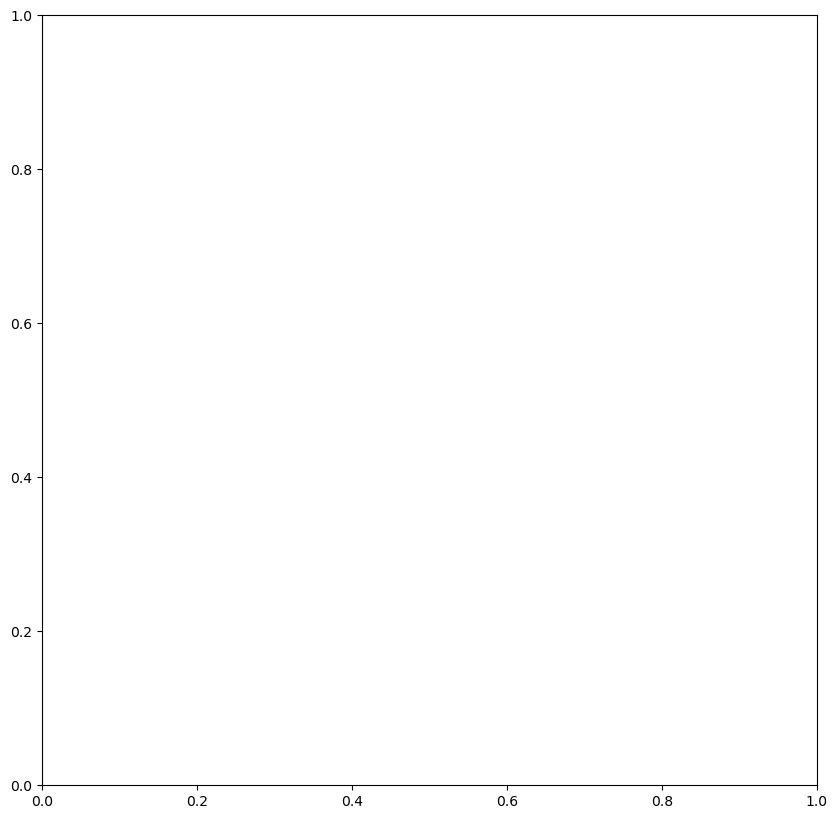

In [16]:
import matplotlib.pyplot as plt

# Assuming chicago and groceries are already loaded GeoDataFrames

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the chicago GeoDataFrame
chicago.plot(ax=ax, color='blue', edgecolor='black')

# Overlay the groceries GeoDataFrame
groceries.plot(ax=ax, color='red', markersize=10, label='Grocery Stores')

# Add title and legend (if desired)
ax.set_title("Chicago with Grocery Stores")
ax.legend()

plt.show()


NameError: name 'chicago' is not defined

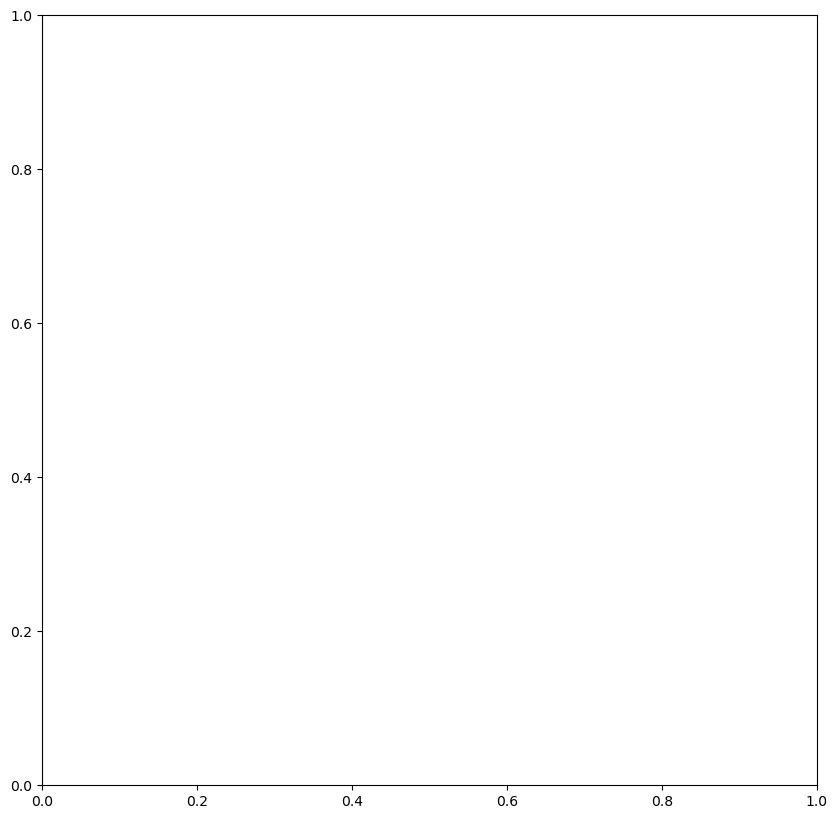

In [17]:
import matplotlib.pyplot as plt

# Assuming chicago and groceries are already loaded GeoDataFrames

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the chicago GeoDataFrame
chicago.plot(ax=ax, color='blue', edgecolor='black')

# Overlay the groceries GeoDataFrame
groceries.plot(ax=ax, color='red', edgecolor='white', label='Groceries')

# Add title and legend
ax.set_title("Chicago with Groceries")
ax.legend()

plt.show()



In [85]:
gpd.sjoin(groceries, chicago,  predicate='within').head(5)

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry,index_right,ComAreaID,...,FirearmM,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,NaN,MULTIPOINT (-87.65661 41.97321),30,3,...,4.6,6.5,50.5,25.2,41.7,353.7,0,170.8,468.7,13.6
87,365,41.961707,-87.654058,OPEN,"4355 N SHERIDAN RD, CHICAGO, IL. 60613-1497",JEWEL OSCO,NaN,MULTIPOINT (-87.65465 41.96138),30,3,...,4.6,6.5,50.5,25.2,41.7,353.7,0,170.8,468.7,13.6
90,373,41.963131,-87.656352,OPEN,"4466 N BROADWAY ST, CHICAGO, IL. 60640-5660",TARGET,NaN,MULTIPOINT (-87.65598 41.96297),30,3,...,4.6,6.5,50.5,25.2,41.7,353.7,0,170.8,468.7,13.6
140,582,41.969131,-87.674882,Chicago-Ravenswood,"1800 W Lawrence Ave, Chicago, IL 60640",Mariano's,NaN,MULTIPOINT (-87.67417 41.96977),30,3,...,4.6,6.5,50.5,25.2,41.7,353.7,0,170.8,468.7,13.6
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,NaN,MULTIPOINT (-87.68136 41.69713),73,75,...,15.8,13.1,50.0,39.8,47.9,298.8,1,800.5,741.1,2.6


In [86]:
groceries.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,NaN,MULTIPOINT (-87.65661 41.97321)
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,NaN,MULTIPOINT (-87.68136 41.69713)
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,NaN,MULTIPOINT (-87.63918 41.86847)
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT (-87.65495 41.87783)
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,NaN,MULTIPOINT (-87.62715 41.73623)
